
## Mean-Variance Optimization 
#### Vaikunthan Mathiyalakan

In [11]:
#building a data frame 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#specifying the full file path to the excel sheet 
file_path = file_path = r'C:\Users\Vai.Mathi\Downloads\multi_asset_etf_data.xlsx'

#reading the excel file 
data = pd.read_excel(file_path, sheet_name= 'excess returns', index_col = 0, parse_dates = ['Date'])

#displaying the first few rows of the DataFrame
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2009-04-30 to 2024-05-31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BWX     182 non-null    float64
 1   DBC     182 non-null    float64
 2   EEM     182 non-null    float64
 3   EFA     182 non-null    float64
 4   HYG     182 non-null    float64
 5   IEF     182 non-null    float64
 6   IYR     182 non-null    float64
 7   PSP     182 non-null    float64
 8   QAI     182 non-null    float64
 9   SPY     182 non-null    float64
 10  TIP     182 non-null    float64
dtypes: float64(11)
memory usage: 17.1 KB


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008440,-0.001554,0.155029,0.114637,0.137906,-0.028005,0.295598,0.229649,0.022329,0.098793,-0.018505
2009-05-31,0.054143,0.163134,0.159871,0.132390,0.029026,-0.020302,0.023198,0.054364,0.028337,0.058925,0.020438
2009-06-30,0.004550,-0.026858,-0.023093,-0.014648,0.032919,-0.006170,-0.025461,0.044850,-0.004035,-0.001253,0.001383
2009-07-31,0.031311,0.018594,0.110173,0.100441,0.069217,0.008344,0.105826,0.143275,0.015352,0.074632,0.000905
2009-08-31,0.007192,-0.040800,-0.013571,0.044595,-0.017405,0.007199,0.131503,0.032977,-0.004586,0.036504,0.007978


## 1. Summary Statistics 

#### (a) Calculate and display the mean and volatility of each asset's excess return. (Recall we use volatility to refer to standard deviaiton)
   
#### (b) Which assets have the best and worst Sharpe ratios?

In [12]:
#1a 
#calculating and displaying mean / vol

def performance_summary(data, adj_factor=12):
    summary = {}
    summary["Annualized Mean"] = data.mean() * adj_factor
    summary["Annualized Volatility"] = data.std() * np.sqrt(adj_factor)
    summary["Annualized Sharpe Ratio"] = (
        summary["Annualized Mean"] / summary["Annualized Volatility"]
    )
    return pd.DataFrame(summary, index=data.columns)

metrics = performance_summary(data).sort_values(
    "Annualized Sharpe Ratio", ascending=False
)
metrics.style.format("{:.2}")

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
SPY,0.15,0.15,0.98
HYG,0.063,0.088,0.71
IYR,0.12,0.19,0.65
PSP,0.13,0.23,0.59
EFA,0.084,0.16,0.51
TIP,0.02,0.052,0.39
QAI,0.019,0.051,0.38
EEM,0.065,0.19,0.33
IEF,0.011,0.064,0.17
DBC,0.022,0.18,0.12


In [13]:
#1b
#to conclude which asset has the best and worst ratios to answer
best_sharpe_ratio_asset = sharpe_ratios.idxmax()
worst_sharpe_ratio_asset = sharpe_ratios.idxmin()

#display the results 
print(f"\nAsset with the best Sharpe ratio: {best_sharpe_ratio_asset} ({sharpe_ratios[best_sharpe_ratio_asset]:.4f})")
print(f"Asset with the worst Sharpe ratio: {worst_sharpe_ratio_asset} ({sharpe_ratios[worst_sharpe_ratio_asset]:.4f})")

NameError: name 'sharpe_ratios' is not defined

## 2. Descriptive Analysis 

#### (a) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

#### (b) How well have TIPS done in our sample? Have they out preformaned domestic bonds? Foreign bonds?

#### (c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset? 

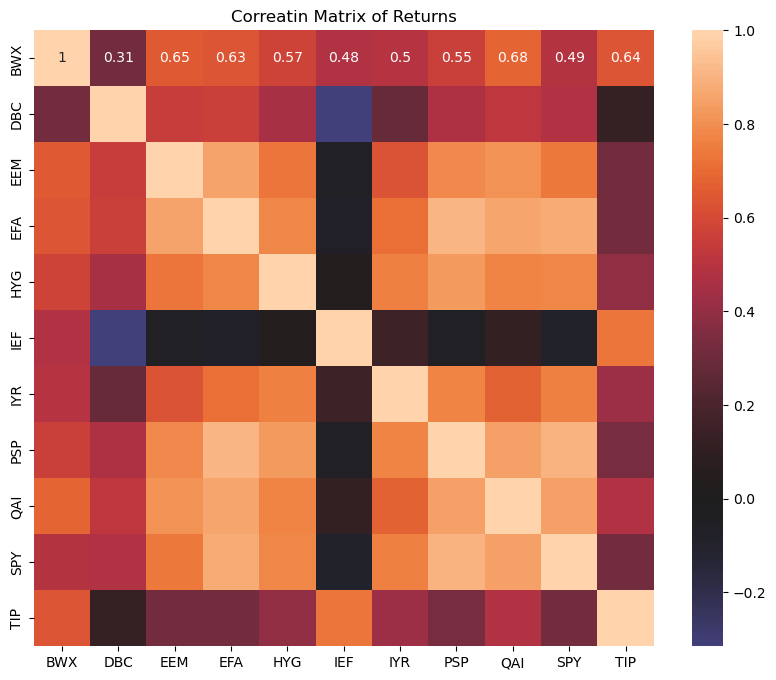

In [14]:
#2a
#calculating the correlation matrix 
correlation_matrix = data.corr()

#visualize the correlation matrix using a heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.title('Correatin Matrix of Returns')
plt.show()

In [15]:
#finding the pairs with the highest and lowest correlations 
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Asset1', 'Asset2', 'Correlation']

# remove self
corr_pairs = corr_pairs[corr_pairs['Asset1'] != corr_pairs['Asset2']]

# highest correlation
highest_corr_pair = corr_pairs.loc[corr_pairs['Correlation'].idxmax()]

# lowest correlation
lowest_corr_pair = corr_pairs.loc[corr_pairs['Correlation'].idxmin()]

print(f"Highest correlation: {highest_corr_pair['Asset1']} and {highest_corr_pair['Asset2']} with a correlation of {highest_corr_pair['Correlation']:.2f}")
print(f"Lowest correlation: {lowest_corr_pair['Asset1']} and {lowest_corr_pair['Asset2']} with a correlation of {lowest_corr_pair['Correlation']:.2f}")

Highest correlation: EFA and PSP with a correlation of 0.90
Lowest correlation: DBC and IEF with a correlation of -0.32


In [17]:
#2b
tips_performance_comparison = metrics.loc[['TIP', 'IEF', 'BWX']]
tips_performance_comparison

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
TIP,0.020233,0.051752,0.390955
IEF,0.011250,0.064291,0.174981
BWX,-0.004532,0.085384,-0.053080


Independently, it appears as though TIPS has performed quite well, and futher, outperforms both domestic and foreign bonds since its Sharpe Ratio and mean annual return is higher with a lower mean annual volatility.

In [18]:
#2c
tickers = ['TIP', 'IEF', 'BWX']

corr_subset = correlation_matrix.loc[tickers, tickers]

corr_subset

,TIP,IEF,BWX
TIP,1.000000,0.725957,0.637803
IEF,0.725957,1.000000,0.483613
BWX,0.637803,0.483613,1.000000


The significant, but not perfect, correlations with other bond types imply that TIPS can help diversify the portfolio, reduing overall risk without sacrificing returns. But the signifiance of the correlation leads me to believe that, while its inclusion in the portfolio is beneficial, it ought not be considered an entirley distinct asset class. 

## 3. The MV Frontier 

#### (a) Compute and display the weights of the tangency portfolios: $\boldsymbol{\omega}^{\text{tan}}$.

#### (b) Compute the mean, volatility, and Sharpe ratio for the tangecy portfolio corresponding to $\boldsymbol{\omega}^{\text{tan}}$.

In [19]:
#3a, used ChatGPT as guide for help 
# Calculate the tangency portfolio weights
def tan_portfolio(mean_returns, cov_matrix):
    inv_cov = np.linalg.inv(cov_matrix)
    ones = np.ones(len(mean_returns))
    return (inv_cov @ mean_returns) / (ones.T @ inv_cov @ mean_returns)

# Calculate the GMV portfolio weights
def gmv_portfolio(cov_matrix):
    inv_cov = np.linalg.inv(cov_matrix)
    ones = np.ones(len(cov_matrix))
    return (inv_cov @ ones) / (ones.T @ inv_cov @ ones)

# Calculate the mixed portfolio weights
def mv_portfolio(mean_returns, cov_matrix, target=None):
    w_tan = tan_portfolio(mean_returns, cov_matrix)
    if target is None:
        return w_tan
    w_gmv = gmv_portfolio(cov_matrix)
    delta = (target - mean_returns @ w_gmv) / (mean_returns @ w_tan - mean_returns @ w_gmv)
    return delta * w_tan + (1 - delta) * w_gmv

# Calculate mean returns and covariance matrix
mean_returns = data.mean()
cov_matrix = data.cov()

# Calculate the tangency portfolio weights
w_tan = mv_portfolio(mean_returns, cov_matrix)

# Create a DataFrame to display the tangency portfolio weights
w_tan_df = pd.DataFrame(w_tan, index=data.columns, columns=['Tangency Portfolio'])

# Sort and display the tangency portfolio allocation
tangency_allocation = w_tan_df.sort_values(by='Tangency Portfolio', ascending=False)
display(tangency_allocation)

# Calculate portfolio returns and metrics
w_tangency_returns = data @ w_tan_df
tan_mean_annual_returns = w_tangency_returns.mean() * 12
tan_mean_annual_vol = w_tangency_returns.std() * np.sqrt(12)
tan_sharpe_ratio = tan_mean_annual_returns / tan_mean_annual_vol

# Create a summary DataFrame for the tangency portfolio metrics
tan_summ = performance_summary(w_tangency_returns)
display(tan_summ.style.format("{:.2f}"))


,Tangency Portfolio
SPY,69.900939
IEF,62.959134
HYG,34.746935
EEM,10.018155
TIP,5.451023
DBC,1.701262
EFA,0.512125
PSP,-11.528256
IYR,-12.366143
BWX,-46.264168


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,8.81,5.29,1.66


## 4. The Allocation 

#### (a) Compute and display the weights of MV portfolios with target reutns of $\mu^p = 0.0075$.

#### (b) What is the mean, volatilty, and Sharpe ratio for $w^p$?

#### (c) Discuss the alloation. In which assets is the portfolio most long? And short?

#### (d) Does this line up with which assets have the strongest Sharpe ratios? 

In [23]:
#4a
target_port = pd.DataFrame(
    mv_portfolio(data.mean(), data.cov(), target=0.0075),
    index=data.columns,
    columns=["Target Portfolio"],
)
target_rets = data @ target_port
target_summ = performance_summary(target_rets)

display(
    pd.concat([w_tan_df, target_port, metrics[["Annualized Sharpe Ratio"]]], axis=1)
    .sort_values(by="Target Portfolio", ascending=False)
    .style.format("{:.3f}")
)
display(pd.concat([tan_summ, target_summ], axis=0).style.format("{:.2f}"))

,Tangency Portfolio,Target Portfolio,Annualized Sharpe Ratio
IEF,62.959,0.677,0.175
SPY,69.901,0.624,0.981
HYG,34.747,0.506,0.713
TIP,5.451,0.209,0.391
EEM,10.018,0.028,0.335
EFA,0.512,0.025,0.509
DBC,1.701,0.014,0.125
QAI,-114.131,-0.107,0.380
IYR,-12.366,-0.142,0.647
PSP,-11.528,-0.236,0.592


,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,8.81,5.29,1.66
Target Portfolio,0.09,0.06,1.47


4c. To conclude which assets are the most long and short, we analyze the most positive and negative weights assoicated with their respective assets. The most long assets as IEF (.67), SPY (.62), and HYG (.50). The most short assets are, similarly, those with the highest negative weights, namely BMW (-0.59), PSP (-0.23), and IYR (-0.14). The portfolio is long on 7 total assets and short on 4 assets. 

4d. There is not a clear pattern. Although the strongesst two assets are close to the top, there are other strong assets like IYR and PSP that are shorted on. This lack of pattern is not very significant however. Since portfolios are often optimized through diversification, the individual volatility of an asset does not matter as much as its covariance. Therefore the asset's sharpe ratio does not mean much because the sharpe ratio only measures volatility and not covariance. 

## 5. Simple Portfolios 

#### (a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale the entire weighting vector to have target mean $\mu^p$ = 0.0075. Report its mean, volatility, and Sharpe ratio. 

#### (b) Calculate the performance of the "risk-parity" portfolio over the sample. Risk-parity is a term used in a variety of ways, but here we will have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample volatility estimate. 

#### $$ w^i = \frac{1}{\sigma_i} $$

#### This will give the weight vector, $w$, but you will need to rescale it ot have a target mean of $\mu^p$ = 0.0075.

#### (c) How does these compare to the MV portfolio from problem 2.4?


In [25]:
#5a
#calculate equal weighted portfolio and rescale to fit target return
w_eq = np.ones(len(data.columns)) / len(data.columns)
w_eq = w_eq * (0.0075 / (data.mean() @ w_eq))
#calc returns of equally weighted portfolio 
w_eq_returns = (data @ w_eq).to_frame('Equally Weighted')
#risk parity portfolio 
w_rp = np.array(1 / np.sqrt(np.diag(data.cov())))
#rescale
w_rp = w_rp * (0.0075 / (data.mean() @ w_rp))
#calc returns 
w_rp_returns = (data @ w_rp).to_frame("Risk Parity")

# Calculate performance summaries.
w_eq_summ = performance_summary(w_eq_returns)
w_rp_summ = performance_summary(w_rp_returns)

w_comparison = pd.DataFrame(
    np.array([w_eq, w_rp]).T,
    index=data.columns,
    columns=["Equally Weighted", "Risk Parity"]
)
target_allocation = 0.0075
w_comparison['Tangency'] = tangency_allocation
w_comparison['Target'] = target_allocation

#display
display(w_comparison.style)

,Equally Weighted,Risk Parity,Tangency,Target
BWX,0.131936,0.219895,-46.264168,0.007500
DBC,0.131936,0.107003,1.701262,0.007500
EEM,0.131936,0.096679,10.018155,0.007500
EFA,0.131936,0.113917,0.512125,0.007500
HYG,0.131936,0.212652,34.746935,0.007500
IEF,0.131936,0.292042,62.959134,0.007500
IYR,0.131936,0.098917,-12.366143,0.007500
PSP,0.131936,0.082716,-11.528256,0.007500
QAI,0.131936,0.368585,-114.131006,0.007500
SPY,0.131936,0.126957,69.900939,0.007500


In [26]:
#5b
pd.concat([w_eq_summ, w_rp_summ, tan_summ, target_summ], axis=0).T

,Equally Weighted,Risk Parity,Tangency Portfolio,Target Portfolio
Annualized Mean,0.090000,0.090000,8.812157,0.090000
Annualized Volatility,0.151070,0.154956,5.293389,0.061026
Annualized Sharpe Ratio,0.595752,0.580809,1.664748,1.474774


5c. When comparing the equally weighted and risk parity portfolios to the MV portfolios, the equally weighted and risk parity have much smaller sharpe ratios. In addition, the tangency portfolio has the largest volatility with target the smallest - both eqully weighted and risk parity are in between but closer to the smaller value. This relationship also holds for their annualized means. 

## 6. Assess how much the Sharpe Ratio goes down if we drop TIPS from the investment set, (and just have a 10-asset problem). See how much it decreases the performance statistic in 2.4. And how much worse is the performance in 3.3?

In [27]:
#Dropping TIPS 
data_no_tips = data.drop("TIP", axis=1)
w_tan_no_tips = mv_portfolio(data_no_tips.mean(), data_no_tips.cov())
w_tan_no_tips_return = (data_no_tips @ w_tan_no_tips).to_frame("Tangency Portfolio (No TIPS)")

# Calculate the performance summary.
w_tan_no_tips_summ = performance_summary(w_tan_no_tips_return)

display(
    pd.concat(
        [
            w_tan_df,
            pd.Series(
                w_tan_no_tips,
                name="Tangency Portfolio (No TIPs)",
                index=data_no_tips.columns,
            ),
        ],
        axis=1,
    )
    .sort_values(by="Tangency Portfolio", ascending=False)
    .style.format("{:.2f}")
)

pd.concat([w_tan_no_tips_summ, tan_summ], axis=0).T.style.format("{:.4f}")

,Tangency Portfolio,Tangency Portfolio (No TIPs)
SPY,69.90,270.60
IEF,62.96,255.36
HYG,34.75,133.86
EEM,10.02,38.92
TIP,5.45,nan
DBC,1.70,8.03
EFA,0.51,0.27
PSP,-11.53,-43.80
IYR,-12.37,-47.27
BWX,-46.26,-177.41


,Tangency Portfolio (No TIPS),Tangency Portfolio
Annualized Mean,33.9335,8.8122
Annualized Volatility,20.3913,5.2934
Annualized Sharpe Ratio,1.6641,1.6647


When comparing the sharpe ratios with and without TIPS, you can observe it does not change much, only by a very small, incremental amount. The presence of TIPS does significantly change the annaulized mean, volatility, and magnitudes of the asset classes.

In [28]:
w_tan_notips_target = mv_portfolio(
    data_no_tips.mean(), data_no_tips.cov(), target=0.0075
)

w_tan_notips_target_rets = (data_no_tips @ w_tan_notips_target).to_frame(
    "Target Portfolio (No TIPS)"
)

w_tan_notips_target_summ = performance_summary(w_tan_notips_target_rets).T
w_tan_notips_target_summ["Target Portfolio"] = target_summ.T["Target Portfolio"]

target_port.loc[:"SPY", "Target Portfolio (No TIPS)"] = w_tan_notips_target
display(target_port[target_port.columns[::-1]].style.format("{:.3f}"))
display(w_tan_notips_target_summ)

,Target Portfolio (No TIPS),Target Portfolio
BWX,-0.594,-0.598
DBC,0.029,0.014
EEM,0.030,0.028
EFA,0.008,0.025
HYG,0.511,0.506
IEF,0.809,0.677
IYR,-0.139,-0.142
PSP,-0.234,-0.236
QAI,-0.057,-0.107
SPY,0.636,0.624


,Target Portfolio (No TIPS),Target Portfolio
Annualized Mean,0.090000,0.090000
Annualized Volatility,0.061288,0.061026
Annualized Sharpe Ratio,1.468482,1.474774


Observing the effects of TIPS presence once more, you can see its presense does not hold much weight upon the allocations or performance summary numbers. The largest noteable change is the allocation amount to IEF, which is further attribitable to their high correlations with TIPS. 